In [2]:
import pandas as pd
import numpy as np

In [3]:
data_dir = '../data/train_test'
selected_bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12']

## Data preprocessing

### Augmenting rows

In [4]:
def add_column_statistics(df, columns, by_column=None, add_std=False):
    df = df.copy()

    if by_column:
        for i in columns:
            df[f'{i}_min_by_fid'] = df.groupby(by_column)[i].transform('min')
            df[f'{i}_max_by_fid'] = df.groupby(by_column)[i].transform('max')
            df[f'{i}_avg_by_fid'] = df.groupby(by_column)[i].transform('mean')

            if add_std:
                df[f'{i}_std_by_fid'] = df.groupby(by_column)[i].transform('std')
    else:
        for i in columns:
            if add_std:
                df[f'{i}_std'] = df.filter(regex = f'^{i}').std(axis = 1)
                
            df[f'{i}_max'] = df.filter(regex = f'^{i}').max(axis = 1)
            df[f'{i}_min'] = df.filter(regex = f'^{i}').min(axis = 1)
            df[f'{i}_avg'] =df.filter(regex = f'^{i}').mean(axis = 1)

    return df
    

def add_column_mappings(df, columns, add_sqrt=False):
    df = df.copy()

    for i in columns:
        
        if add_sqrt:
            df[f'{i}_sqrt'] = np.sqrt(df[i].values)
            
        df[f'{i}_exp'] = np.exp(df[i].values)
        df[f'{i}_^2'] = df[i].values**2
    
    return df

### Add spetral indices

In [5]:
spectral_indices = [
    "NDVI",
    "GNDVI",
    # "EVI",
    "EVI2",
    # "AdvVI", # Advanced vegitation index
    "BSI",
    "SI",
    "NDWI",
    "NDMI",
    "NPCRI",
    "SAVI",
    "MSI",
    "GCI",
    "NBRI",
    "NDSI",
    "NDGI",
    "ARVI",
    "SIPI",
    
    # other from paper  https://www.spiedigitallibrary.org/journals/journal-of-applied-remote-sensing/volume-12/issue-02/026019/Crop-classification-from-Sentinel-2-derived-vegetation-indices-using-ensemble/10.1117/1.JRS.12.026019.full 
    # "AFRI1.6",
    # "AFRI2.1",
    #"ARI",
    # "ARVI_paper",
    # "ARVI2", # depends on a hyperparameter
    # "ATSAVI" # depends on a hyperparameter
    # "AshVI", # Ashburn vegetation index
    # "BNDVI",
    # "BRI",
    
    # "BWDRVI",
    # "MCARI1",
    # "MCARI2",
    # "CCCI",
    # "CRI550",
    # "CRI700",
    # "CVI",
    # "Datt1",
    # "Datt2",
    # "Datt3",
    # "DVI",
    # "NDI45"
]

def add_spectral_indices(df, phi=1, a=1.22, b=0.03, X=0.08):
    df = df.copy()
    
    df["NDVI"] = (df["B08"] - df["B04"]) / (df["B08"] + df["B04"])
    df["GNDVI"] = (df["B08"] - df["B03"]) / (df["B08"] + df["B03"])
    # df["EVI"] = 2.5 * ((df["B08"] - df["B04"]) / ((df["B08"] + 6.0 * df["B04"] - 7.5 * df['B02']) + 1.0))
    df["EVI2"] = 2.4 * (df["B08"] - df["B04"]) / (df["B08"] + df["B04"] + 1.0)
    # df["AdvVI"] = (df["B08"] * (1 - df["B04"]) * (df["B08"] - df["B04"]))**(1/3)
    df["BSI"] = ((df["B11"] + df["B04"]) - (df["B08"] + df["B02"])) / ((df["B11"] + df["B04"]) + (df["B08"] + df["B02"]))
    df["SI"] = ((1 - df["B02"]) * (1 - df["B03"]) * (1 - df["B04"]))
    df["NDWI"] = (df["B03"] - df["B08"]) / (df["B03"] + df["B08"])
    df["NDMI"] = (df["B08"] - df["B11"]) / (df["B08"] + df["B11"]) 
    df["NPCRI"] = (df["B04"] - df["B02"]) / (df["B04"] + df["B02"]) 
    df["SAVI"] = (df["B08"] - df["B04"]) / (df["B08"] + df["B04"] + 0.428) * (1.428)
    df["MSI"] = df["B11"] / df["B08"]
    df["GCI"] = (df["B09"] / df["B03"]) - 1
    df["NBRI"] = (df["B08"] - df["B12"]) / (df["B08"] + df["B12"])
    df["NDSI"] = (df["B03"] - df["B11"]) / (df["B03"] + df["B11"])
    df["NDGI"] = (df["B03"] - df["B04"]) / (df["B03"] + df["B04"]) 
    df["ARVI"] = (df["B08"] - (2 * df["B04"]) + df["B02"]) / (df["B08"] + (2 * df["B04"]) + df["B02"]) 
    df["SIPI"] = (df["B08"] - df["B02"]) / (df["B08"] - df["B04"])
    
    # other from paper  https://www.spiedigitallibrary.org/journals/journal-of-applied-remote-sensing/volume-12/issue-02/026019/Crop-classification-from-Sentinel-2-derived-vegetation-indices-using-ensemble/10.1117/1.JRS.12.026019.full 
    # df["AFRI1.6"] = (df["B8A"] - 0.66*df["B11"]) / (df["B8A"] + 0.66*df["B11"])
    # df["AFRI2.1"] = (df["B8A"] - 0.5*df["B12"]) / (df["B8A"] + 0.5*df["B12"])
    # df["ARI"] = ((1/df["B03"]) - (1/df["B05"]))
    # df["ARVI_paper"] = (df["B08"] - (df["B04"] - phi*(df["B02"] - df["B04"]))) / (df["B08"] + (df["B04"] - phi*(df["B02"] - df["B04"])))
    # df["ARVI2"] = -0.18 + 1.17 + ((df["B08"] - df["B04"]) / (df["B08"] + df["B04"]))
    # df["ATSAVI"] = a*(df["B08"] - a*df["B04"] - b) / (df["B08"] + df["B04"] - a*b + X*(1 + a**2))
    # df["AshVI"] = 2*df["B8A"] - df["B04"]
    # df["BNDVI"] = (df["B08"] - df["B02"]) / (df["B08"] + df["B02"])
    # df["BRI"] = ((1 / df["B03"]) - (1 / df["B05"])) / df["B06"]
    
    # df["BWDRVI"] = (0.1*df["B07"] - df["B02"])/(0.1*df["B07"] + df["B02"])
    
    # Chlorophyll absorption ratio index
    # df["MCARI"] = ((df["B05"] - df["B04"]) - 0.2*(df["B05"] - df["B03"])) * (df["B05"]/df["B04"])
    # df["MCARI1"] = 1.2 * (2.5 * df["B08"] - df["B04"]) - 1.3*(df["B08"] - df["B03"])
    # df["MCARI2"] = 1.5 * ((2.5 * (df["B08"] - df["B04"]) - 1.3*(df["B08"] - df["B03"])) / ((((2*df["B08"] + 1)**2 - (6*df["B08"] - 5*(df["B04"]**(1/2)))) ** (1/2))) - 0.5)
    
    # df["CCCI"] = ((df["B08"] - df["B05"]) / (df["B08"] + df["B05"])) / ((df["B08"] - df["B04"]) / (df["B08"] + df["B04"]))
    # df["CRI550"] = (1 / df["B02"]) - (1 / df["B03"])
    # df["CRI700"] = (1 / df["B02"]) - (1 / df["B05"])
    # df["CVI"] = (df["B08"] * df["B08"]) / (df["B03"])**2
    # df["Datt1"] = (df["B08"] - df["B05"]) / (df["B08"] + df["B04"])
    # df["Datt2"] = df["B04"] / (df["B03"] * df["B05"])
    # df["Datt3"] = df["B8A"] / (df["B03"] * df["B05"])
    # df["DVI"] = 2.4 * df["B08"] - df["B04"]
    # df["NDI45"] = (df["B05"] - df["B04"]) / (df["B05"] + df["B04"])
    
    return df

In [6]:
df_train = pd.read_csv(f"{data_dir}/preprocessed/tabular_train.csv")
df_test = pd.read_csv(f"{data_dir}/preprocessed/tabular_test.csv")
df_all = pd.concat([df_train, df_test])

display(df_all.head())

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,field_id,crop
0,44,40,40,42,45,59,70,63,76,13,78,55,1374,1.0
1,44,40,40,42,45,59,70,62,76,13,78,55,1374,1.0
2,44,40,39,42,46,52,58,54,62,16,72,53,3293,1.0
3,44,41,39,43,48,58,65,61,71,16,78,61,3293,1.0
4,44,40,40,44,48,58,65,64,71,16,78,61,3293,1.0


In [7]:
# spectral bands
df_all = add_column_statistics(df_all, selected_bands)
# df_all = add_column_mappings(df_all, selected_bands, add_sqrt=True)
df_all = add_column_statistics(df_all, selected_bands, "field_id")

# spectral indices
df_all = add_spectral_indices(df_all)
df_all = add_column_statistics(df_all, spectral_indices)
# df_all = add_column_mappings(df_all, spectral_indices)
df_all = add_column_statistics(df_all, spectral_indices, "field_id")

display(df_all.head())

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,...,NDSI_avg_by_fid,NDGI_min_by_fid,NDGI_max_by_fid,NDGI_avg_by_fid,ARVI_min_by_fid,ARVI_max_by_fid,ARVI_avg_by_fid,SIPI_min_by_fid,SIPI_max_by_fid,SIPI_avg_by_fid
0,44,40,40,42,45,59,70,63,76,13,...,-0.317357,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093
1,44,40,40,42,45,59,70,62,76,13,...,-0.317357,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093
2,44,40,39,42,46,52,58,54,62,16,...,-0.312590,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843
3,44,41,39,43,48,58,65,61,71,16,...,-0.312590,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843
4,44,40,40,44,48,58,65,64,71,16,...,-0.312590,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843


In [8]:
df_all = df_all.join(df_all.groupby("field_id").size().rename(f'num_pixels_by_fid'), on='field_id')

df_all.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,...,NDGI_min_by_fid,NDGI_max_by_fid,NDGI_avg_by_fid,ARVI_min_by_fid,ARVI_max_by_fid,ARVI_avg_by_fid,SIPI_min_by_fid,SIPI_max_by_fid,SIPI_avg_by_fid,num_pixels_by_fid
0,44,40,40,42,45,59,70,63,76,13,...,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093,36
1,44,40,40,42,45,59,70,62,76,13,...,-0.057471,0.0,-0.032736,0.065990,0.146067,0.091702,1.000000,1.277778,1.139093,36
2,44,40,39,42,46,52,58,54,62,16,...,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843,19
3,44,41,39,43,48,58,65,61,71,16,...,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843,19
4,44,40,40,44,48,58,65,64,71,16,...,-0.085106,0.0,-0.051285,0.042254,0.139535,0.073813,0.909091,1.500000,1.232843,19


In [9]:
tmp = df_all.drop(columns=["crop"])

tmp.loc[:, tmp.isna().any()]

""
0
1
2
3
4
...
49313
49314
49315
49316


## Feature selection

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train = df_all[~df_all["crop"].isnull()]
df_test = df_all[df_all["crop"].isnull()]
y_train = X_train["crop"]

X_train = X_train.drop(columns=["field_id", "crop"])
X_test = df_test.drop(columns=["field_id", "crop"])

In [12]:
X_train.shape, y_train.shape, X_test.shape

((188228, 197), (188228,), (49318, 197))

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 5, shuffle = True)

In [14]:
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_predict
from sklearn.utils.class_weight import compute_class_weight

In [15]:
label_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [16]:
# cb_pi --> catboost_permutation_importance\n",
cb_pi = CatBoostClassifier(n_estimators = 1400, learning_rate = 0.03, random_state = 11, task_type = "GPU")
cb_pi.fit(X_train, y_train)

0:	learn: 2.4186658	total: 38.2ms	remaining: 53.5s
1:	learn: 2.3023201	total: 74ms	remaining: 51.8s
2:	learn: 2.2050475	total: 111ms	remaining: 51.9s
3:	learn: 2.1231129	total: 149ms	remaining: 52.1s
4:	learn: 2.0487176	total: 185ms	remaining: 51.7s
5:	learn: 1.9844476	total: 221ms	remaining: 51.3s
6:	learn: 1.9256421	total: 255ms	remaining: 50.8s
7:	learn: 1.8723964	total: 289ms	remaining: 50.3s
8:	learn: 1.8240689	total: 326ms	remaining: 50.3s
9:	learn: 1.7791693	total: 358ms	remaining: 49.7s
10:	learn: 1.7382584	total: 390ms	remaining: 49.2s
11:	learn: 1.7006152	total: 425ms	remaining: 49.2s
12:	learn: 1.6666277	total: 459ms	remaining: 49s
13:	learn: 1.6333708	total: 492ms	remaining: 48.7s
14:	learn: 1.6032134	total: 524ms	remaining: 48.4s
15:	learn: 1.5743604	total: 557ms	remaining: 48.2s
16:	learn: 1.5476983	total: 590ms	remaining: 48s
17:	learn: 1.5231953	total: 623ms	remaining: 47.8s
18:	learn: 1.4993851	total: 654ms	remaining: 47.5s
19:	learn: 1.4771774	total: 685ms	remaining: 

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
pi = PermutationImportance(cb_pi, random_state = 90, n_iter = 5)
pi.fit(X_val, y_val)
eli5.show_weights(pi, feature_names = X_train.columns.tolist(), top = None)

Weight,Feature
0.0435 ± 0.0006,num_pixels_by_fid
0.0300 ± 0.0009,NDSI_min_by_fid
0.0083 ± 0.0012,CCCI_avg_by_fid
0.0083 ± 0.0006,NDGI_min_by_fid
0.0063 ± 0.0009,NDI45_avg_by_fid
0.0058 ± 0.0006,BRI_avg_by_fid
0.0052 ± 0.0002,B02_avg_by_fid
0.0047 ± 0.0005,CRI700_max_by_fid
0.0047 ± 0.0005,NDI45_min_by_fid
0.0045 ± 0.0008,CCCI_min_by_fid


In [ ]:
pi_results = eli5.formatters.as_dataframe.explain_weights_df(pi, feature_names = X_train.columns.tolist())
# feature importance weigth threshold is 0\n",
low_importance = pi_results[pi_results.weight <= 0].feature.values
low_importance

array(['CRI550_^2', 'CVI_^2', 'CRI700_exp', 'CRI550_exp', 'CCCI_^2',
       'CCCI_exp', 'MCARI2_^2', 'MCARI2_exp', 'CVI_exp', 'MCARI1_^2',
       'MCARI1_exp', 'BNDVI_^2', 'NDI45_exp', 'DVI_exp', 'DVI_^2',
       'BWDRVI_exp', 'NDI45_^2', 'B12_^2', 'B12_exp', 'B12_sqrt',
       'B11_^2', 'B11_exp', 'B11_sqrt', 'B09_exp', 'B09_sqrt', 'B8A_^2',
       'B8A_exp', 'BWDRVI_^2', 'EVI2', 'NDVI', 'GNDVI', 'NDVI_max',
       'NDI45', 'DVI', 'CVI', 'CRI700', 'CRI550', 'CCCI', 'BNDVI_exp',
       'MCARI1', 'MCARI', 'BWDRVI', 'BRI', 'BNDVI', 'AshVI', 'ARVI2',
       'AFRI2.1', 'AFRI1.6', 'SIPI', 'ARVI', 'NDGI', 'NBRI', 'MSI',
       'SAVI', 'NPCRI', 'NDMI', 'NDWI', 'SI', 'BSI', 'B08_^2', 'B8A_sqrt',
       'B07_^2', 'B08_exp', 'B08_min', 'B07_avg', 'B07_min', 'B07_max',
       'B06_avg', 'B06_min', 'B06_max', 'B05_avg', 'B05_min', 'B05_max',
       'B04_avg', 'B04_min', 'B04_max', 'B03_avg', 'B03_min', 'B03_max',
       'B02_avg', 'B02_min', 'B02_max', 'B12', 'B11', 'B09', 'B8A', 'B08',
       'B0

In [ ]:
features_to_drop = low_importance

In [ ]:
X_train_curated = X_train.drop(columns = features_to_drop)
X_test_curated = X_test.drop(columns = features_to_drop)

X_train_curated.shape, X_test_curated.shape

((150582, 127), (49318, 127))

## Cross Validation

In [ ]:
from lightgbm import LGBMClassifier

cb = CatBoostClassifier(n_estimators = 1500, learning_rate=0.03, depth = 6, random_state = 11, bagging_temperature = 1, task_type = "GPU")

# Use "class_weights = label_weights" for cross validation
cb2 = CatBoostClassifier(n_estimators = 1100, learning_rate=0.03, depth = 6, random_state = 11, bagging_temperature = 1, task_type = "GPU", class_weights = label_weights)

lb = LGBMClassifier(n_estimators = 1100, learning_rate=0.03, max_depth = 6, random_state = 11)

# Use "class_weights = label_weights" for cross validation
lb2 = LGBMClassifier(n_estimators = 1100, learning_rate=0.03, max_depth = 6, random_state = 11,  class_weights = label_weights)
      

NameError: name 'CatBoostClassifier' is not defined

In [ ]:
# Catboost without weights
cv1 = cross_val_predict(cb, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 2.4185666	total: 25.4ms	remaining: 38s
1:	learn: 2.2997354	total: 51.2ms	remaining: 38.3s
2:	learn: 2.2017295	total: 77.4ms	remaining: 38.6s
3:	learn: 2.1168953	total: 103ms	remaining: 38.4s
4:	learn: 2.0426496	total: 130ms	remaining: 38.8s
5:	learn: 1.9761070	total: 153ms	remaining: 38.2s
6:	learn: 1.9187379	total: 177ms	remaining: 37.8s
7:	learn: 1.8648125	total: 200ms	remaining: 37.3s
8:	learn: 1.8159969	total: 226ms	remaining: 37.5s
9:	learn: 1.7716356	total: 252ms	remaining: 37.5s
10:	learn: 1.7310147	total: 275ms	remaining: 37.2s
11:	learn: 1.6930270	total: 299ms	remaining: 37.1s
12:	learn: 1.6583850	total: 324ms	remaining: 37s
13:	learn: 1.6256462	total: 344ms	remaining: 36.6s
14:	learn: 1.5943976	total: 366ms	remaining: 36.2s
15:	learn: 1.5651680	total: 390ms	remaining: 36.2s
16:	learn: 1.5384945	total: 412ms	remaining: 36s
17:	learn: 1.5119328	total: 434ms	remaining: 35.8s
18:	learn: 1.4878990	total: 457ms	remaining: 35.6s
19:	learn: 1.4644019	total: 482ms	remaining:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s


0:	learn: 2.4155969	total: 24.3ms	remaining: 36.5s
1:	learn: 2.2971981	total: 47.9ms	remaining: 35.8s
2:	learn: 2.1981971	total: 70.5ms	remaining: 35.2s
3:	learn: 2.1137152	total: 92.8ms	remaining: 34.7s
4:	learn: 2.0388563	total: 114ms	remaining: 34s
5:	learn: 1.9731313	total: 134ms	remaining: 33.4s
6:	learn: 1.9144209	total: 157ms	remaining: 33.5s
7:	learn: 1.8616691	total: 180ms	remaining: 33.5s
8:	learn: 1.8137048	total: 202ms	remaining: 33.5s
9:	learn: 1.7693093	total: 224ms	remaining: 33.4s
10:	learn: 1.7290230	total: 246ms	remaining: 33.3s
11:	learn: 1.6919017	total: 268ms	remaining: 33.3s
12:	learn: 1.6573941	total: 288ms	remaining: 33s
13:	learn: 1.6245294	total: 311ms	remaining: 33s
14:	learn: 1.5934632	total: 336ms	remaining: 33.2s
15:	learn: 1.5644902	total: 358ms	remaining: 33.2s
16:	learn: 1.5377051	total: 380ms	remaining: 33.1s
17:	learn: 1.5121683	total: 401ms	remaining: 33s
18:	learn: 1.4878929	total: 424ms	remaining: 33.1s
19:	learn: 1.4650103	total: 445ms	remaining: 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


0:	learn: 2.4176749	total: 21.5ms	remaining: 32.3s
1:	learn: 2.2994009	total: 43.8ms	remaining: 32.8s
2:	learn: 2.2015997	total: 66.3ms	remaining: 33.1s
3:	learn: 2.1166763	total: 87.1ms	remaining: 32.6s
4:	learn: 2.0430866	total: 107ms	remaining: 32s
5:	learn: 1.9772949	total: 127ms	remaining: 31.6s
6:	learn: 1.9195145	total: 149ms	remaining: 31.7s
7:	learn: 1.8650917	total: 172ms	remaining: 32.1s
8:	learn: 1.8164066	total: 195ms	remaining: 32.3s
9:	learn: 1.7716214	total: 217ms	remaining: 32.4s
10:	learn: 1.7308304	total: 240ms	remaining: 32.5s
11:	learn: 1.6929776	total: 263ms	remaining: 32.6s
12:	learn: 1.6581617	total: 285ms	remaining: 32.6s
13:	learn: 1.6249061	total: 305ms	remaining: 32.4s
14:	learn: 1.5938197	total: 329ms	remaining: 32.6s
15:	learn: 1.5647584	total: 353ms	remaining: 32.7s
16:	learn: 1.5373027	total: 375ms	remaining: 32.7s
17:	learn: 1.5111543	total: 397ms	remaining: 32.6s
18:	learn: 1.4867797	total: 420ms	remaining: 32.8s
19:	learn: 1.4642996	total: 441ms	remai

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


0:	learn: 2.4156321	total: 22.4ms	remaining: 33.5s
1:	learn: 2.2964916	total: 44.5ms	remaining: 33.3s
2:	learn: 2.1976756	total: 67ms	remaining: 33.4s
3:	learn: 2.1124995	total: 88.2ms	remaining: 33s
4:	learn: 2.0389308	total: 108ms	remaining: 32.3s
5:	learn: 1.9730971	total: 128ms	remaining: 31.9s
6:	learn: 1.9146051	total: 152ms	remaining: 32.3s
7:	learn: 1.8619936	total: 174ms	remaining: 32.4s
8:	learn: 1.8133397	total: 198ms	remaining: 32.8s
9:	learn: 1.7684991	total: 220ms	remaining: 32.8s
10:	learn: 1.7279432	total: 242ms	remaining: 32.8s
11:	learn: 1.6906888	total: 264ms	remaining: 32.8s
12:	learn: 1.6552418	total: 286ms	remaining: 32.8s
13:	learn: 1.6224378	total: 306ms	remaining: 32.5s
14:	learn: 1.5915275	total: 331ms	remaining: 32.8s
15:	learn: 1.5625423	total: 356ms	remaining: 33s
16:	learn: 1.5350616	total: 378ms	remaining: 33s
17:	learn: 1.5090888	total: 401ms	remaining: 33s
18:	learn: 1.4843518	total: 425ms	remaining: 33.1s
19:	learn: 1.4613710	total: 446ms	remaining: 33

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


0:	learn: 2.4158279	total: 21.3ms	remaining: 31.9s
1:	learn: 2.2957282	total: 44.3ms	remaining: 33.2s
2:	learn: 2.1963321	total: 67.8ms	remaining: 33.8s
3:	learn: 2.1119967	total: 89.5ms	remaining: 33.5s
4:	learn: 2.0378516	total: 113ms	remaining: 33.9s
5:	learn: 1.9718732	total: 134ms	remaining: 33.4s
6:	learn: 1.9143597	total: 156ms	remaining: 33.3s
7:	learn: 1.8601321	total: 179ms	remaining: 33.5s
8:	learn: 1.8117162	total: 203ms	remaining: 33.7s
9:	learn: 1.7667779	total: 225ms	remaining: 33.5s
10:	learn: 1.7257936	total: 248ms	remaining: 33.5s
11:	learn: 1.6883117	total: 271ms	remaining: 33.6s
12:	learn: 1.6530696	total: 293ms	remaining: 33.5s
13:	learn: 1.6205764	total: 315ms	remaining: 33.5s
14:	learn: 1.5893195	total: 337ms	remaining: 33.4s
15:	learn: 1.5602185	total: 361ms	remaining: 33.4s
16:	learn: 1.5330436	total: 384ms	remaining: 33.5s
17:	learn: 1.5073039	total: 406ms	remaining: 33.4s
18:	learn: 1.4830702	total: 426ms	remaining: 33.2s
19:	learn: 1.4602864	total: 448ms	rem

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [ ]:
# Catboost with weights
cv2 = cross_val_predict(cb2, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 2.4739026	total: 23.7ms	remaining: 26.1s
1:	learn: 2.3980517	total: 47.9ms	remaining: 26.3s
2:	learn: 2.3301373	total: 71.6ms	remaining: 26.2s
3:	learn: 2.2652589	total: 95.3ms	remaining: 26.1s
4:	learn: 2.2027828	total: 120ms	remaining: 26.3s
5:	learn: 2.1521241	total: 155ms	remaining: 28.2s
6:	learn: 2.1072001	total: 178ms	remaining: 27.8s
7:	learn: 2.0659259	total: 201ms	remaining: 27.5s
8:	learn: 2.0226175	total: 226ms	remaining: 27.4s
9:	learn: 1.9840042	total: 250ms	remaining: 27.2s
10:	learn: 1.9490764	total: 273ms	remaining: 27s
11:	learn: 1.9147335	total: 295ms	remaining: 26.8s
12:	learn: 1.8782121	total: 318ms	remaining: 26.6s
13:	learn: 1.8464271	total: 341ms	remaining: 26.4s
14:	learn: 1.8148744	total: 364ms	remaining: 26.4s
15:	learn: 1.7828311	total: 390ms	remaining: 26.4s
16:	learn: 1.7552432	total: 413ms	remaining: 26.3s
17:	learn: 1.7322615	total: 435ms	remaining: 26.1s
18:	learn: 1.7079438	total: 458ms	remaining: 26s
19:	learn: 1.6844532	total: 482ms	remaini

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s remaining:    0.0s


0:	learn: 2.4712890	total: 22.8ms	remaining: 25.1s
1:	learn: 2.3977697	total: 48ms	remaining: 26.3s
2:	learn: 2.3268006	total: 72.8ms	remaining: 26.6s
3:	learn: 2.2711849	total: 94.5ms	remaining: 25.9s
4:	learn: 2.2177842	total: 118ms	remaining: 25.9s
5:	learn: 2.1678080	total: 141ms	remaining: 25.7s
6:	learn: 2.1146485	total: 164ms	remaining: 25.6s
7:	learn: 2.0742474	total: 187ms	remaining: 25.5s
8:	learn: 2.0324245	total: 211ms	remaining: 25.6s
9:	learn: 1.9913694	total: 235ms	remaining: 25.6s
10:	learn: 1.9544628	total: 258ms	remaining: 25.6s
11:	learn: 1.9207315	total: 280ms	remaining: 25.4s
12:	learn: 1.8829018	total: 306ms	remaining: 25.5s
13:	learn: 1.8508720	total: 329ms	remaining: 25.5s
14:	learn: 1.8183289	total: 352ms	remaining: 25.5s
15:	learn: 1.7895441	total: 376ms	remaining: 25.5s
16:	learn: 1.7564607	total: 402ms	remaining: 25.6s
17:	learn: 1.7223460	total: 428ms	remaining: 25.7s
18:	learn: 1.6963059	total: 452ms	remaining: 25.7s
19:	learn: 1.6691716	total: 477ms	remai

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   50.1s remaining:    0.0s


0:	learn: 2.4732291	total: 23.7ms	remaining: 26.1s
1:	learn: 2.3915488	total: 48.4ms	remaining: 26.6s
2:	learn: 2.3257004	total: 72.4ms	remaining: 26.5s
3:	learn: 2.2679554	total: 95.3ms	remaining: 26.1s
4:	learn: 2.2140015	total: 119ms	remaining: 26.1s
5:	learn: 2.1682772	total: 142ms	remaining: 25.8s
6:	learn: 2.1213662	total: 166ms	remaining: 25.9s
7:	learn: 2.0796438	total: 189ms	remaining: 25.8s
8:	learn: 2.0387681	total: 213ms	remaining: 25.9s
9:	learn: 1.9983328	total: 237ms	remaining: 25.8s
10:	learn: 1.9635128	total: 260ms	remaining: 25.7s
11:	learn: 1.9281547	total: 283ms	remaining: 25.7s
12:	learn: 1.8946825	total: 307ms	remaining: 25.7s
13:	learn: 1.8641116	total: 331ms	remaining: 25.7s
14:	learn: 1.8278476	total: 355ms	remaining: 25.7s
15:	learn: 1.7888502	total: 381ms	remaining: 25.8s
16:	learn: 1.7596297	total: 405ms	remaining: 25.8s
17:	learn: 1.7270975	total: 430ms	remaining: 25.9s
18:	learn: 1.7032285	total: 452ms	remaining: 25.7s
19:	learn: 1.6813723	total: 472ms	rem

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


0:	learn: 2.4743861	total: 23.7ms	remaining: 26s
1:	learn: 2.3987665	total: 48.3ms	remaining: 26.5s
2:	learn: 2.3258677	total: 72.9ms	remaining: 26.6s
3:	learn: 2.2664351	total: 95.4ms	remaining: 26.1s
4:	learn: 2.2098411	total: 120ms	remaining: 26.3s
5:	learn: 2.1646519	total: 142ms	remaining: 25.9s
6:	learn: 2.1204486	total: 166ms	remaining: 25.8s
7:	learn: 2.0794170	total: 190ms	remaining: 25.9s
8:	learn: 2.0315218	total: 215ms	remaining: 26.1s
9:	learn: 1.9952463	total: 238ms	remaining: 26s
10:	learn: 1.9557702	total: 262ms	remaining: 25.9s
11:	learn: 1.9192292	total: 285ms	remaining: 25.9s
12:	learn: 1.8885728	total: 309ms	remaining: 25.8s
13:	learn: 1.8602133	total: 332ms	remaining: 25.7s
14:	learn: 1.8267671	total: 355ms	remaining: 25.7s
15:	learn: 1.7990385	total: 379ms	remaining: 25.6s
16:	learn: 1.7624098	total: 404ms	remaining: 25.7s
17:	learn: 1.7340042	total: 429ms	remaining: 25.8s
18:	learn: 1.7004588	total: 454ms	remaining: 25.9s
19:	learn: 1.6727335	total: 479ms	remaini

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


0:	learn: 2.4765371	total: 23.5ms	remaining: 25.9s
1:	learn: 2.3970001	total: 47.1ms	remaining: 25.9s
2:	learn: 2.3255714	total: 71.3ms	remaining: 26.1s
3:	learn: 2.2658838	total: 93.8ms	remaining: 25.7s
4:	learn: 2.2109397	total: 117ms	remaining: 25.7s
5:	learn: 2.1609830	total: 140ms	remaining: 25.5s
6:	learn: 2.1164610	total: 162ms	remaining: 25.3s
7:	learn: 2.0757605	total: 185ms	remaining: 25.3s
8:	learn: 2.0364336	total: 208ms	remaining: 25.3s
9:	learn: 1.9955127	total: 231ms	remaining: 25.2s
10:	learn: 1.9577905	total: 255ms	remaining: 25.2s
11:	learn: 1.9218503	total: 279ms	remaining: 25.3s
12:	learn: 1.8860210	total: 303ms	remaining: 25.3s
13:	learn: 1.8560699	total: 325ms	remaining: 25.2s
14:	learn: 1.8191129	total: 351ms	remaining: 25.4s
15:	learn: 1.7918875	total: 374ms	remaining: 25.3s
16:	learn: 1.7588956	total: 399ms	remaining: 25.4s
17:	learn: 1.7293116	total: 423ms	remaining: 25.4s
18:	learn: 1.7026683	total: 446ms	remaining: 25.4s
19:	learn: 1.6710753	total: 472ms	rem

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


In [25]:
# Bagged LDA
cv3 = cross_val_predict(lb, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.5min finished


In [ ]:
# Bagged LDA
cv4 = cross_val_predict(lb2, X_train_curated, y_train, cv = 5, method = "predict_proba", verbose = 5)

## Dertermining weights

In [26]:
def determine_weights(cvs, y):
    # Code to determine weights
    scores = []

    for w in range(0, 101):
        w = w / 100.
        #  two cross-validation results of choice should be imputed to determine appropriate weights
        scores.append(log_loss(y, (w * cvs[0]) + ((1 - w) * cvs[1])))

    best_score = min(scores)
    weight = scores.index(best_score) / 100.

    return (weight, best_score)

In [27]:
determine_weights([cv1, cv2], y_train)

(1.0, 0.17266901599640624)

In [28]:
determine_weights([cv1, cv3], y_train)

(1.0, 0.17266901599640624)

In [29]:
determine_weights([cv1, cv4], y_train)

(1.0, 0.45226892469859314)

In [ ]:
determine_weights([cv2, cv3], y_train)

In [ ]:
determine_weights([cv2, cv4], y_train)

In [ ]:
determine_weights([cv3, cv4], y_train)

## Training

In [30]:
cb.fit(X_train_curated, y_train)
cb2.fit(X_train_curated, y_train)
lb.fit(X_train_curated, y_train)
lb2.fit(X_train_curated, y_train)

0:	learn: 2.4152053	total: 30.5ms	remaining: 45.7s
1:	learn: 2.2969182	total: 60ms	remaining: 44.9s
2:	learn: 2.1978673	total: 89.8ms	remaining: 44.8s
3:	learn: 2.1128391	total: 120ms	remaining: 44.7s
4:	learn: 2.0381082	total: 146ms	remaining: 43.8s
5:	learn: 1.9735416	total: 173ms	remaining: 43.2s
6:	learn: 1.9161470	total: 200ms	remaining: 42.7s
7:	learn: 1.8632396	total: 225ms	remaining: 41.9s
8:	learn: 1.8145286	total: 254ms	remaining: 42.1s
9:	learn: 1.7697162	total: 282ms	remaining: 42s
10:	learn: 1.7286904	total: 309ms	remaining: 41.8s
11:	learn: 1.6902984	total: 337ms	remaining: 41.8s
12:	learn: 1.6551198	total: 362ms	remaining: 41.4s
13:	learn: 1.6216885	total: 389ms	remaining: 41.3s
14:	learn: 1.5903405	total: 417ms	remaining: 41.3s
15:	learn: 1.5613664	total: 443ms	remaining: 41.1s
16:	learn: 1.5341000	total: 468ms	remaining: 40.8s
17:	learn: 1.5088424	total: 493ms	remaining: 40.6s
18:	learn: 1.4844301	total: 517ms	remaining: 40.3s
19:	learn: 1.4617706	total: 542ms	remainin

BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=30,
                  random_state=0)

## Inference

In [31]:
test_preds_1 = cb.predict_proba(X_test_curated)
test_preds_2 = cb2.predict_proba(X_test_curated)
test_preds_3 = lb.predict_proba(X_test_curated)
test_preds_4 = lb2.predict_proba(X_test_curated)

### Weighted Average

In [40]:
w1, w2, w3 = 0.75, 0.80, 0.5

# Level 1
test_preds_12 = (w1 * test_preds_1) + ((1 - w1) * test_preds_2)

# Level 2
test_preds_34 = (w2 * test_preds_3) + ((1 - w2) * test_preds_4)

test_preds = (w2 * test_preds_12) + ((1 - w2) * test_preds_34)

In [41]:
test_preds.shape

(49318, 13)

In [42]:
test_preds = pd.DataFrame(test_preds)
test_preds = pd.concat(
    [
        df_test["field_id"].reset_index(drop=True),
        test_preds.reset_index(drop=True)
    ],
    axis=1
)

display(test_preds.head())

,field_id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5407,0.160902,0.637541,0.152154,0.012602,0.000167,0.006000,0.028615,0.001498,0.000274,0.000038,0.000042,0.000033,0.000135
1,5407,0.160866,0.638554,0.151177,0.012595,0.000167,0.006000,0.028616,0.001498,0.000281,0.000040,0.000039,0.000033,0.000135
2,5407,0.160794,0.623031,0.166838,0.012605,0.000167,0.005998,0.028614,0.001498,0.000230,0.000031,0.000025,0.000033,0.000135
3,5407,0.160791,0.624382,0.165479,0.012606,0.000167,0.005999,0.028614,0.001498,0.000239,0.000032,0.000027,0.000033,0.000135
4,5407,0.160935,0.627560,0.162115,0.012580,0.000168,0.005909,0.028735,0.001498,0.000265,0.000037,0.000030,0.000033,0.000136


In [43]:
test_preds = test_preds.groupby("field_id")[list(range(13))].mean()
display(test_preds.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
field_id,,,,,,,,,,,,,
11,0.229468,0.229087,0.017771,0.070598,0.002683,0.447209,0.000304,0.002137,0.000074,0.000073,0.000190,0.000067,0.000339
13,0.588669,0.176158,0.010601,0.196718,0.003271,0.017456,0.002026,0.000049,0.001476,0.000088,0.000416,0.000931,0.002142
19,0.410815,0.255883,0.036478,0.051838,0.001243,0.241243,0.000275,0.000014,0.000292,0.001774,0.000069,0.000064,0.000011
21,0.069230,0.238137,0.022781,0.473327,0.002805,0.186754,0.001951,0.000215,0.000747,0.000094,0.002406,0.001334,0.000219
25,0.114022,0.026664,0.155721,0.702099,0.000099,0.001082,0.000067,0.000002,0.000186,0.000007,0.000003,0.000046,0.000003


### Checking predictions

<BarContainer object of 10 artists>

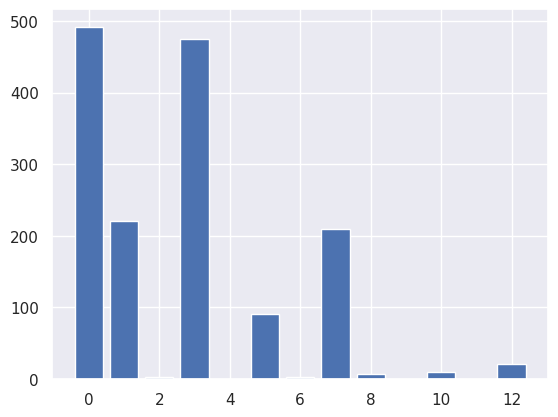

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.bar(*np.unique(test_preds.values.argmax(axis=-1), return_counts=True))

## Submission

In [45]:
submission = pd.read_csv(f"{data_dir}/SampleSubmission.csv")
display(submission.head())

,Field ID,Wheat,Mustard,Lentil,No Crop,Green pea,Sugarcane,Garlic,Maize,Gram,Coriander,Potato,Bersem,Rice
0,11,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
submission["Wheat"] = test_preds[0].values
submission["Mustard"] = test_preds[1].values
submission["Lentil"] = test_preds[2].values
submission["No Crop"] = test_preds[3].values
submission["Green pea"] = test_preds[4].values
submission["Sugarcane"] = test_preds[5].values
submission["Garlic"] = test_preds[6].values
submission["Gram"] = test_preds[7].values
submission["Maize"] = test_preds[8].values
submission["Coriander"] = test_preds[9].values
submission["Potato"] = test_preds[10].values
submission["Bersem"] = test_preds[11].values
submission["Rice"] = test_preds[12].values

display(submission.head())

,Field ID,Wheat,Mustard,Lentil,No Crop,Green pea,Sugarcane,Garlic,Maize,Gram,Coriander,Potato,Bersem,Rice
0,11,0.229468,0.229087,0.017771,0.070598,0.002683,0.447209,0.000304,0.000074,0.002137,0.000073,0.000190,0.000067,0.000339
1,13,0.588669,0.176158,0.010601,0.196718,0.003271,0.017456,0.002026,0.001476,0.000049,0.000088,0.000416,0.000931,0.002142
2,19,0.410815,0.255883,0.036478,0.051838,0.001243,0.241243,0.000275,0.000292,0.000014,0.001774,0.000069,0.000064,0.000011
3,21,0.069230,0.238137,0.022781,0.473327,0.002805,0.186754,0.001951,0.000747,0.000215,0.000094,0.002406,0.001334,0.000219
4,25,0.114022,0.026664,0.155721,0.702099,0.000099,0.001082,0.000067,0.000186,0.000002,0.000007,0.000003,0.000046,0.000003


In [47]:
submission.to_csv(f"{data_dir}/submission.csv", index = False)

## References
- Papers
    - https://www.researchgate.net/publication/360681295_The_Evaluation_of_Spectral_Vegetation_Indexes_and_Redundancy_Reduction_on_the_Accuracy_of_Crop_Type_Detection
    - https://www.spiedigitallibrary.org/journals/journal-of-applied-remote-sensing/volume-12/issue-02/026019/Crop-classification-from-Sentinel-2-derived-vegetation-indices-using-ensemble/10.1117/1.JRS.12.026019.full
    - https://github.com/ArnolFokam/crop-type-detection-ICLR-2020/blob/master/solutions/youngtard/solution.ipynb

- Ideas & ressources
    - https://bigearth.net/#downloads
    - https://www.mdpi.com/2072-4292/13/23/4875
    - https://ai.facebook.com/blog/dino-paws-computer-vision-with-self-supervised-transformers-and-10x-more-efficient-training/